<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [89]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [90]:
iowa_file = '/Users/Divya/desktop/DSI-SF-2-divyasusarla/Datasets/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [91]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [92]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [93]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [94]:
iowa.shape

(270955, 18)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [95]:
# Columns I want to clean:
# Sale (Dollars) - convert from object to float and replace $ sign
# State Bottle Retail - convert from object to float and replace $ sign
# State Bottle Cost - convert from object to float and replace $ sign
# Date - convert from object to datetime - I know this in not requried, just want to try

In [96]:
iowa['Date'] = pd.to_datetime(iowa['Date'])

# iowa['Date'] = pd.to_datetime(iowa['Date'], format='%m/%d/%Y')

### 3.2 Clean the columns

In [97]:
for col in ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']:
    iowa[col] = [float(x.replace('$', '')) for x in iowa[col]]
   
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetim

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [98]:
iowa['MONTH'] = iowa['Date'].map(lambda val: val.month)
iowa['YEAR'] = iowa['Date'].map(lambda val: val.year)
iowa['DAY'] = iowa['Date'].map(lambda val: val.day)



In [99]:
from datetime import date

date_group = iowa.groupby(['Store Number'])[['Date']].agg([np.min, np.max])

date_group.columns = ['mindate','maxdate' ]
date_group.reset_index()

date_group['min'] = date_group['mindate']
date_group['max'] = date_group['maxdate']
date_group['min'].head

mind = date(2015,01,01)
maxd = date(2015,12,31)

date_mask = (date_group['mindate']<=mind)|(date_group['maxdate']>=maxd)

date_group = date_group[date_mask]

stores_list = list(date_group.index)

stores_mask = iowa['Store Number'].isin(stores_list)

iowa_dated = iowa[stores_mask]
iowa_dated.head(4)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),MONTH,YEAR,DAY
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,11,2015,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,3,2016,2
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,2,2016,11
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,2,2016,3


In [ ]:
# I filtered out the stores that openened or closed in 2015.

# This problem was the hardest for me and the one I saved till the end - I ended up asking a lot of questions
# on approaching this problem and worked with classmates.
# Choosing to not include stores open in 2015 made most sense to me. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.


### 5.1 Calculate yearly liquor sales for each store in 2015.

In [100]:
year_mask = iowa_dated[iowa_dated['YEAR'] == 2015]
year_mask.groupby(['Store Number', 'YEAR'])[['Sale (Dollars)']].sum().reset_index()

,Store Number,YEAR,Sale (Dollars)
0,2106,2015,146326.22
1,2113,2015,9310.22
2,2130,2015,111871.43
3,2152,2015,7721.08
4,2178,2015,24324.18
5,2190,2015,121689.06
6,2191,2015,125093.49
7,2200,2015,22811.55
8,2228,2015,17462.07
9,2233,2015,29553.34


### 5.2 Calculate the profit each store is making in 2015.


In [101]:
iowa_dated['total profit']= (iowa_dated['State Bottle Retail'] - iowa_dated['State Bottle Cost'])*iowa_dated['Bottles Sold']
iowa_dated[iowa_dated['YEAR'] == 2015].groupby(['Store Number', 'YEAR'])[['total profit']].sum().reset_index()

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Store Number,YEAR,total profit
0,2106,2015,48838.08
1,2113,2015,3109.04
2,2130,2015,37325.20
3,2152,2015,2587.53
4,2178,2015,8165.70
5,2190,2015,40617.73
6,2191,2015,41744.39
7,2200,2015,7653.47
8,2228,2015,5844.34
9,2233,2015,9866.66


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [102]:
iowa_dated['profit_per_gallon'] = iowa_dated['total profit'] / iowa_dated['Volume Sold (Gallons)']

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
iowa_dated[iowa_dated['YEAR'] == 2015].groupby(['County', 'YEAR'])[['profit_per_gallon']].sum().sort_values(
    by = 'profit_per_gallon', ascending = False).reset_index()

,County,YEAR,profit_per_gallon
0,Polk,2015,961990.228053
1,Linn,2015,435983.482090
2,Scott,2015,317522.447266
3,Black Hawk,2015,280972.997051
4,Johnson,2015,257205.453714
5,Story,2015,164517.030899
6,Woodbury,2015,161866.364454
7,Pottawattamie,2015,161857.043688
8,Dubuque,2015,139058.002178
9,Cerro Gordo,2015,112963.505708


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [104]:
mask_2015 = iowa_dated[iowa_dated['YEAR'] == 2015]

mask_2015[['profit_per_gallon', 'Volume Sold (Gallons)']].corr()

# As the ratio of profit to store size increases, the store size decreases. 
# There is a negative correlation between the profit to store size ration and store size. 

,profit_per_gallon,Volume Sold (Gallons)
profit_per_gallon,1.000000,-0.084622
Volume Sold (Gallons),-0.084622,1.000000


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [105]:
iowa_dated.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),MONTH,YEAR,DAY,total profit,profit_per_gallon
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.0,2.38,11,2015,4,27.00,11.344538
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,20.63,2,41.26,1.5,0.40,3,2016,2,13.76,34.400000
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,18.89,24,453.36,24.0,6.34,2,2016,11,151.20,23.848580
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,14.25,6,85.50,10.5,2.77,2,2016,3,28.50,10.288809
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,10.80,12,129.60,21.0,5.55,8,2015,18,43.20,7.783784


In [106]:
# iowa_dated['Category Name'].unique()

# NAMES = ['BRANDIE', 'WHISKIE', 'VODKA', 'GIN', 'SCHNAPP', 'TEQUILA', 'SCOTCH', 'RUM']


def liquor_cat(row):
    if type(row)== str:
        
        if 'WHISKIES' in row:
            return 'Whiskie'
        elif 'BRANDIES' in row:
            return 'Brandies'
        elif 'VODKA' in row:
            return 'Vodka'
        elif 'GIN' in row:
            return 'Gin'
        elif 'SCHNAPPS' in row:
            return 'Schnapps'
        elif 'TEQUILA' in row:
            return 'Tequila'
        elif 'SCOTCH' in row:
            return 'Scotch'
        elif 'RUM' in row:
            return 'Rum'
        else:
            return "Other"
            
    return row

iowa_dated['liquor_type'] = iowa_dated['Category Name'].apply(liquor_cat)
iowa_dated.head()


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),MONTH,YEAR,DAY,total profit,profit_per_gallon,liquor_type
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,12,81.00,9.0,2.38,11,2015,4,27.00,11.344538,Brandies
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,2,41.26,1.5,0.40,3,2016,2,13.76,34.400000,Whiskie
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,24,453.36,24.0,6.34,2,2016,11,151.20,23.848580,Whiskie
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,6,85.50,10.5,2.77,2,2016,3,28.50,10.288809,Other
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,12,129.60,21.0,5.55,8,2015,18,43.20,7.783784,Vodka


### 5.7 Do relationships exist between the broader liquor type and profit?

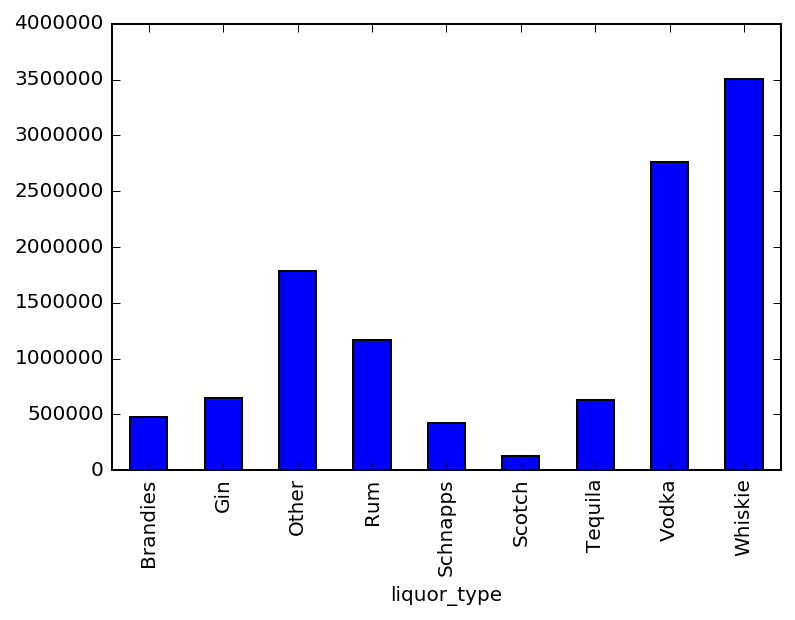

In [107]:
iowa_dated.groupby('liquor_type')['total profit'].sum().plot(kind = 'bar')

# There is a relationship. Whisky, Vodka and Rum seem to be driving the most profit. 
# Other also is - could be worth categorizing more to get more specifics.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [116]:
iowa_dated.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'MONTH', u'YEAR', u'DAY', u'total profit', u'profit_per_gallon',
       u'liquor_type'],
      dtype='object')

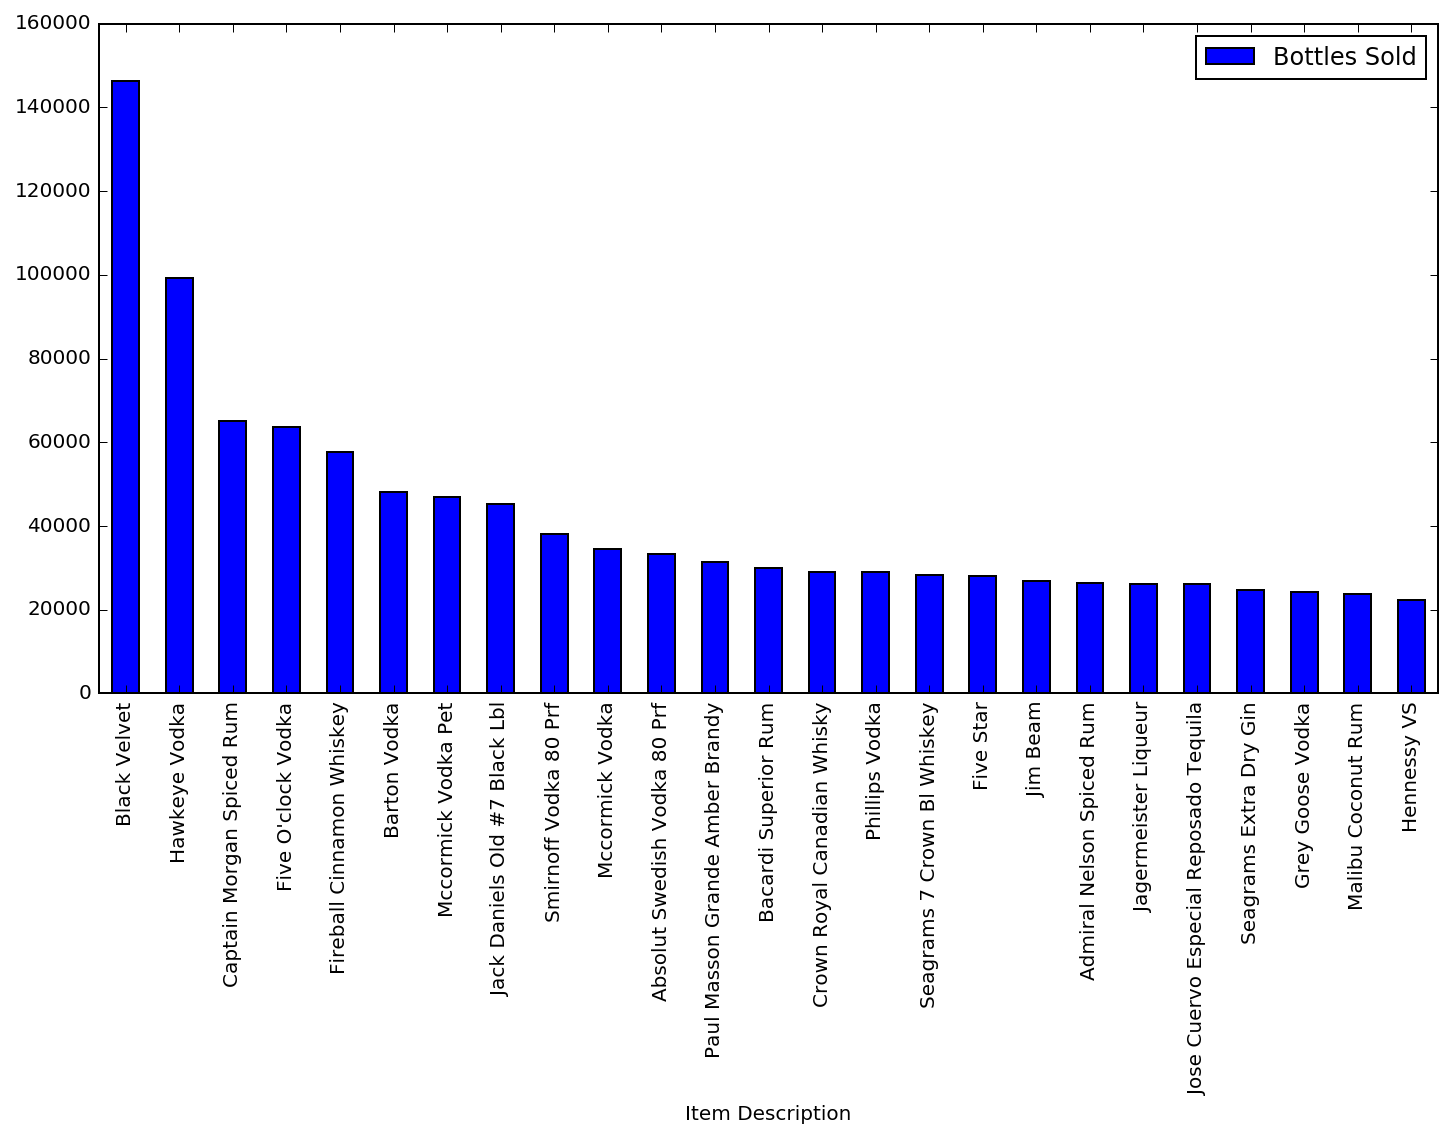

In [122]:
iowa_dated.groupby(['Item Description'])[['Bottles Sold']].sum().sort_values(by='Bottles Sold', 
ascending = False).head(25).plot(kind ='bar', figsize = (12,6))

# Yes there is a relationship between liquor brand and sales, Black velvet seems to have the most sales. 

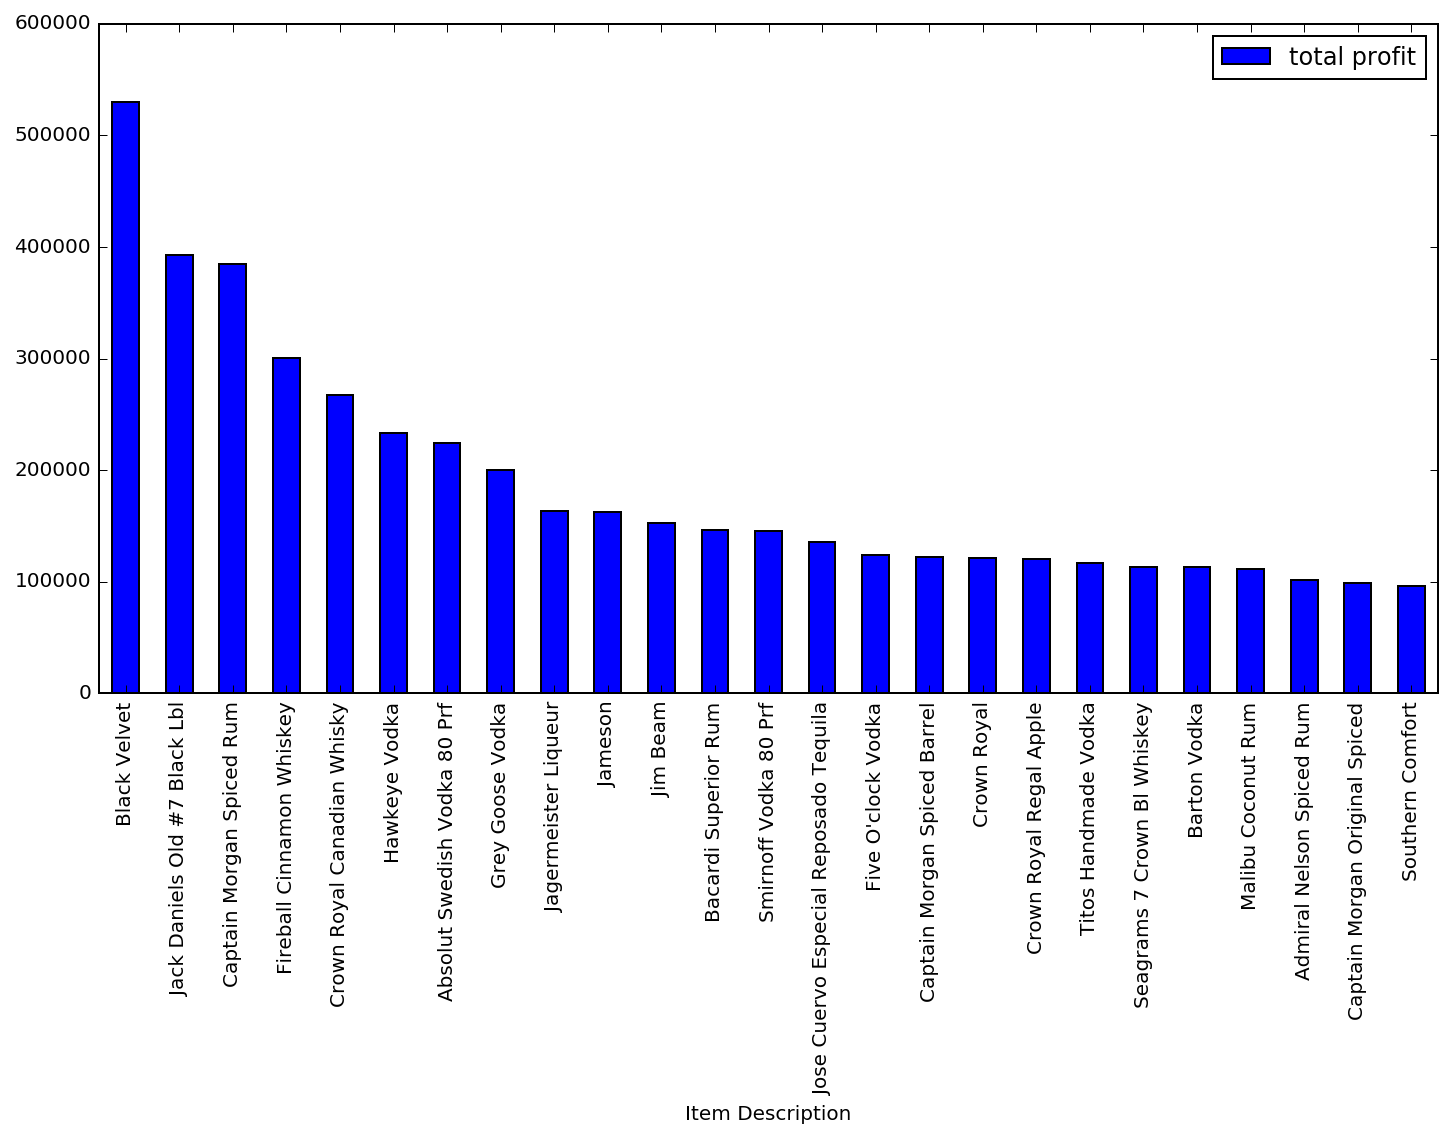

In [123]:
iowa_dated.groupby(['Item Description'])[['total profit']].sum().sort_values(by='total profit', 
ascending = False).head(25).plot(kind ='bar', figsize = (12,6))

# There is also a relationship between total profit and brand - Black Velvet once again has the most profit. 

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [108]:
# size of store = total gallons sold in 2015 (from above question)

top_5_profit_stores = iowa_dated.groupby('Store Number')['total profit'].sum().sort_values(ascending = False).reset_index().iloc[0:5, 0]
print top_5_profit_stores


store_2633 = iowa_dated[iowa_dated['Store Number'] == 2633]
# print store_2633

store_4829 = iowa_dated[iowa_dated['Store Number'] == 4829]
# print store_4829

store_2512 = iowa_dated[iowa_dated['Store Number'] == 2512]
# print store_2512

store_3385 = iowa_dated[iowa_dated['Store Number'] == 3385]
# print store_3385

store_3420 = iowa_dated[iowa_dated['Store Number'] == 3420]
# print store_3420


print store_2633.groupby('liquor_type')['Volume Sold (Gallons)'].sum().sort_values(ascending = False)
print store_4829.groupby('liquor_type')['Volume Sold (Gallons)'].sum().sort_values(ascending = False)
print store_2512.groupby('liquor_type')['Volume Sold (Gallons)'].sum().sort_values(ascending = False)
print store_3385.groupby('liquor_type')['Volume Sold (Gallons)'].sum().sort_values(ascending = False)
print store_3420.groupby('liquor_type')['Volume Sold (Gallons)'].sum().sort_values(ascending = False)


# Since the tax board does not want to be obvious about taxing the larger stores, 
# I found the top 5 stores by profit and then looked at the liquor type they sold by volume the most. 
# My suggestion would be to implement a tax on Vodka as it is the liquor type sold most in the stores making the most
# profit. The tax on Vodka will impact the larger stores without explicitly stating so. 




0    2633
1    4829
2    2512
3    3385
4    3420
Name: Store Number, dtype: int64
liquor_type
Vodka       5266.60
Other       3420.77
Tequila     3101.66
Whiskie     2774.31
Rum         2403.98
Gin         1536.32
Schnapps    1256.10
Brandies     184.03
Scotch        70.60
Name: Volume Sold (Gallons), dtype: float64
liquor_type
Vodka       5080.57
Other       3196.48
Whiskie     3007.94
Tequila     1630.39
Rum         1202.47
Gin         1190.36
Schnapps    1117.74
Brandies     223.03
Scotch        60.89
Name: Volume Sold (Gallons), dtype: float64
liquor_type
Vodka       2640.36
Whiskie     2064.09
Other       1430.86
Gin          863.64
Rum          671.08
Tequila      620.41
Schnapps     372.65
Brandies     113.18
Scotch        40.85
Name: Volume Sold (Gallons), dtype: float64
liquor_type
Vodka       2403.37
Other       2391.91
Whiskie     2272.94
Gin          709.68
Rum          580.50
Tequila      530.86
Schnapps     514.37
Brandies     108.99
Scotch        19.43
Name: Volume Sold

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [109]:
Q1_2015 = iowa_dated[iowa_dated['Date'] >= '01/01/2015'][iowa_dated['Date'] < '04/01/2015']

Q1_2016 = iowa_dated[iowa_dated['Date'] >= '01/01/2016'][iowa_dated['Date'] < '04/01/2016']

Q1_2015_stores = Q1_2015.groupby(['Store Number', 'County'])[['total profit']].sum().reset_index()
Q1_2016_stores = Q1_2016.groupby(['Store Number', 'County'])[['total profit']].sum().reset_index()

comparison = pd.merge(Q1_2015_stores, Q1_2016_stores, on=('Store Number', 'County'), how='outer')
comparison.columns = ['Store Number', 'County', 'Total_Profit_2015', 'Total_Profit_2016']
comparison['Profit_Change'] = comparison['Total_Profit_2016'] - comparison['Total_Profit_2015']

comparison.sort_values(by='Profit_Change', ascending = False).head(10)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Store Number,County,Total_Profit_2015,Total_Profit_2016,Profit_Change
190,3477.0,Pottawattamie,5372.46,17749.20,12376.74
33,2512.0,Johnson,27409.09,37524.26,10115.17
177,3354.0,Scott,9913.95,18416.94,8502.99
1166,5102.0,Linn,9237.52,17375.44,8137.92
186,3447.0,Woodbury,18125.66,25337.28,7211.62
91,2595.0,Crawford,3396.57,10014.65,6618.08
6,2191.0,Lee,9723.40,15784.53,6061.13
283,3773.0,Linn,16202.92,22078.27,5875.35
193,3494.0,Black Hawk,7578.66,12554.52,4975.86
149,2670.0,Johnson,13406.72,18250.77,4844.05


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [110]:
comparison['Profit_Growth'] = comparison['Profit_Change'] / comparison['Total_Profit_2015']
comparison.head()

# I have created a ratio called profit growth that takes my profit change/total 2015 profit.

,Store Number,County,Total_Profit_2015,Total_Profit_2016,Profit_Change,Profit_Growth
0,2106.0,Black Hawk,13108.37,10189.68,-2918.69,-0.222658
1,2113.0,Webster,944.72,693.49,-251.23,-0.265931
2,2130.0,Black Hawk,8108.68,9288.29,1179.61,0.145475
3,2152.0,Cerro Gordo,668.60,304.08,-364.52,-0.545199
4,2178.0,Allamakee,1961.28,1868.76,-92.52,-0.047173


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [111]:
comparison.sort_values(by = 'Profit_Growth', ascending = False).head()

# The profit growth shows that Dickinson County had the most growth and so would be the best area to place a new store.
# Also, given that the total profit in 2016 in Dickinson was only, $315.14, and that the change in profit was $311.40
# This shows that there is a lot of potential for growth, to be able to sell more in coming years. 

,Store Number,County,Total_Profit_2015,Total_Profit_2016,Profit_Change,Profit_Growth
1100,5021.0,Dickinson,3.74,315.14,311.40,83.262032
606,4401.0,Linn,15.94,310.45,294.51,18.476161
1167,5103.0,Muscatine,14.26,244.60,230.34,16.152875
1006,4896.0,Allamakee,20.04,303.61,283.57,14.150200
1178,5128.0,Polk,159.08,2359.55,2200.47,13.832474


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [112]:
Q1_2015 = iowa_dated[iowa_dated['Date'] >= '01/01/2015'][iowa_dated['Date'] < '04/01/2015']

Q1_2016 = iowa_dated[iowa_dated['Date'] >= '01/01/2016'][iowa_dated['Date'] < '04/01/2016']

Q1_2015_stores_by_type = Q1_2015.groupby(['Store Number', 'County', 'liquor_type'])[['total profit']].sum().reset_index()
Q1_2016_stores_by_type = Q1_2016.groupby(['Store Number', 'County', 'liquor_type'])[['total profit']].sum().reset_index()

by_type_comparison = pd.merge(Q1_2015_stores_by_type, Q1_2016_stores_by_type, on=(
        'Store Number', 'County', 'liquor_type'), how='outer')
by_type_comparison.columns = ['Store Number', 'County', 'Liquor_Type', 'Total_Profit_2015', 'Total_Profit_2016']

by_type_comparison['Profit_Change'] = by_type_comparison['Total_Profit_2016'] - by_type_comparison['Total_Profit_2015']
by_type_comparison['Profit_Growth'] = by_type_comparison['Profit_Change'] / by_type_comparison['Total_Profit_2015']

by_type_comparison.head()

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Store Number,County,Liquor_Type,Total_Profit_2015,Total_Profit_2016,Profit_Change,Profit_Growth
0,2106.0,Black Hawk,Brandies,241.92,156.72,-85.20,-0.352183
1,2106.0,Black Hawk,Gin,762.99,406.50,-356.49,-0.467228
2,2106.0,Black Hawk,Other,3246.74,1227.78,-2018.96,-0.621842
3,2106.0,Black Hawk,Rum,2379.90,2146.50,-233.40,-0.098071
4,2106.0,Black Hawk,Schnapps,1034.04,1542.72,508.68,0.491935


In [113]:
liquor_by_county = by_type_comparison.groupby(['County', 'Liquor_Type'])[['Profit_Growth']].apply(np.mean).sort_values(
    by = 'Profit_Growth', ascending = False).reset_index()

liquor_by_county.head()

# The best type of liquor to sell would be Schnapps and the county would change to Ida. 

,County,Liquor_Type,Profit_Growth
0,Ida,Schnapps,22.738351
1,Winneshiek,Schnapps,20.934346
2,Ida,Rum,14.241390
3,Calhoun,Rum,11.737569
4,Allamakee,Gin,11.124748


In [86]:
liquor_by_county[liquor_by_county['County'] == 'Dickinson']

# Schnapps would not sell well in Dickinson.
# If he wants to stay in Dickinson he should sell Vodka. 

,County,Liquor_Type,Profit_Growth
36,Dickinson,Vodka,3.923124
240,Dickinson,Rum,0.763610
250,Dickinson,Tequila,0.723710
253,Dickinson,Other,0.711473
293,Dickinson,Scotch,0.604369
307,Dickinson,Brandies,0.554250
321,Dickinson,Gin,0.526535
439,Dickinson,Whiskie,0.262992
687,Dickinson,Schnapps,-0.392270


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?